In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf

In [2]:
#Reading our data from yahoo finance

df= yf.download('BCSVX BUFHX MSMLX PRISX PTIAX QUSIX SIUSX FSPTX',start='2016-10-01', end='2021-10-01')
df.head()

[*********************100%***********************]  8 of 8 completed


Adj Close                                                       \
                BCSVX     BUFHX     FSPTX      MSMLX      PRISX      PTIAX   
Date                                                                         
2016-09-30  10.974316  8.125959  7.020284  14.785800  15.401784  17.662291   
2016-10-03  11.047539  8.133084  7.007811  14.849532  15.301679  17.662291   
2016-10-04  11.056692  8.140212  7.003654  14.920347  15.330277  17.631474   
2016-10-05  11.056692  8.147343  7.035353  14.941592  15.473285  17.616066   
2016-10-06  10.946857  8.140212  7.038990  14.948671  15.423231  17.600655   

                                  Close         ...   Open            Volume  \
                QUSIX      SIUSX  BCSVX  BUFHX  ...  QUSIX      SIUSX  BCSVX   
Date                                            ...                            
2016-09-30  10.552436  15.331997  11.99  11.40  ...  12.82  18.549999      0   
2016-10-03  10.601824  15.331997  12.07  11.41  ...  12.88  18.549999      0   
2016-10-04  10.634749  15.290685  12.08  11.42  ...  12.92  18.500000      0   
2016-10-05  10.585361  15.282418  12.08  11.43  ...  12.86  18.490000      0   
2016-10-06  10.527742  15.265888  11.96  11.42  ...  12.79  18.469999      0   

                                                      
           BUFHX FSPTX MSMLX PRISX PTIAX QUSIX SIUSX  
Date                                                  
2016-09-30     0     0     0     0     0     0     0  
2016-10-03     0     0     0     0     0     0     0  
2016-10-04     0     0     0     0     0     0     0  
2016-10-05     0     0     0     0     0     0     0  
2016-10-06     0     0     0     0     0     0     0  

[5 rows x 48 columns]

In [3]:
df = df['Adj Close']
df.head()

,BCSVX,BUFHX,FSPTX,MSMLX,PRISX,PTIAX,QUSIX,SIUSX
Date,,,,,,,,
2016-09-30,10.974316,8.125959,7.020284,14.785800,15.401784,17.662291,10.552436,15.331997
2016-10-03,11.047539,8.133084,7.007811,14.849532,15.301679,17.662291,10.601824,15.331997
2016-10-04,11.056692,8.140212,7.003654,14.920347,15.330277,17.631474,10.634749,15.290685
2016-10-05,11.056692,8.147343,7.035353,14.941592,15.473285,17.616066,10.585361,15.282418
2016-10-06,10.946857,8.140212,7.038990,14.948671,15.423231,17.600655,10.527742,15.265888


In [4]:
# Log of percentage change and creeate Covariance matrix
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,BCSVX,BUFHX,FSPTX,MSMLX,PRISX,PTIAX,QUSIX,SIUSX
BCSVX,9.205052e-05,1.691252e-05,0.000089,6.401402e-05,0.000061,7.308644e-07,5.602546e-05,-7.172488e-08
BUFHX,1.691252e-05,8.397498e-06,0.000027,1.762911e-05,0.000029,1.340924e-06,1.636908e-05,1.406241e-07
FSPTX,8.903608e-05,2.674652e-05,0.000241,1.117013e-04,0.000146,-1.542042e-06,4.974066e-05,-3.966805e-06
MSMLX,6.401402e-05,1.762911e-05,0.000112,1.158644e-04,0.000091,1.132761e-07,5.345520e-05,-1.648548e-06
PRISX,6.107628e-05,2.893478e-05,0.000146,9.133647e-05,0.000220,-3.757321e-06,6.798999e-05,-9.599096e-06
PTIAX,7.308644e-07,1.340924e-06,-0.000002,1.132761e-07,-0.000004,3.297781e-06,5.625942e-07,2.897819e-06
QUSIX,5.602546e-05,1.636908e-05,0.000050,5.345520e-05,0.000068,5.625942e-07,7.619977e-05,-1.435128e-06
SIUSX,-7.172488e-08,1.406241e-07,-0.000004,-1.648548e-06,-0.000010,2.897819e-06,-1.435128e-06,4.794639e-06


In [5]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,BCSVX,BUFHX,FSPTX,MSMLX,PRISX,PTIAX,QUSIX,SIUSX
BCSVX,1.000000,0.608304,0.598051,0.619851,0.429510,0.041948,0.668953,-0.003414
BUFHX,0.608304,1.000000,0.594809,0.565172,0.673688,0.254811,0.647102,0.022162
FSPTX,0.598051,0.594809,1.000000,0.668758,0.635495,-0.054723,0.367215,-0.116748
MSMLX,0.619851,0.565172,0.668758,1.000000,0.572509,0.005795,0.568903,-0.069944
PRISX,0.429510,0.673688,0.635495,0.572509,1.000000,-0.139599,0.525511,-0.295778
PTIAX,0.041948,0.254811,-0.054723,0.005795,-0.139599,1.000000,0.035490,0.728756
QUSIX,0.668953,0.647102,0.367215,0.568903,0.525511,0.035490,1.000000,-0.075082
SIUSX,-0.003414,0.022162,-0.116748,-0.069944,-0.295778,0.728756,-0.075082,1.000000


In [6]:
# Randomly weighted portfolio's variance
w = {'BCSVX':0.125, 'BUFHX':0.125, 'MSMLX':0.125, 'PRISX':0.125,'PTIAX':0.125,'QUSIX':0.125,'SIUSX':0.125,'FSPTX':0.125,}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
Ann_port_std = (port_var*252)**(0.5)
print (port_var)
print (port_var*252)

3.9419314704432933e-05
0.0099336673055171


In [7]:
Ann_port_std

0.09966778469253292

In [8]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

BCSVX    0.228729
BUFHX    0.060804
FSPTX    0.333257
MSMLX    0.187494
PRISX    0.151281
PTIAX    0.047332
QUSIX    0.111495
SIUSX    0.050824
dtype: float64

In [9]:
# Portfolio returns
w = [0.125, 0.125,0.125,0.125,0.125,0.125,0.125,0.125,]
port_er = (w*ind_er).sum()
port_er

0.14640192337970756

In [10]:
# Volatility is given by the annual standard deviation. We multiply by 252 because there are 252 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(252))
ann_sd

BCSVX    0.152305
BUFHX    0.046002
FSPTX    0.246329
MSMLX    0.170874
PRISX    0.235281
PTIAX    0.028828
QUSIX    0.138573
SIUSX    0.034760
dtype: float64

In [11]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
BCSVX,0.228729,0.152305
BUFHX,0.060804,0.046002
FSPTX,0.333257,0.246329
MSMLX,0.187494,0.170874
PRISX,0.151281,0.235281
PTIAX,0.047332,0.028828
QUSIX,0.111495,0.138573
SIUSX,0.050824,0.034760


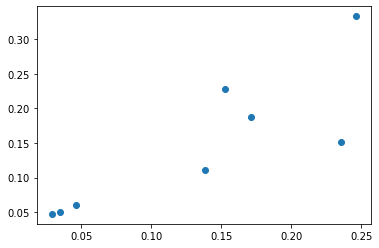

In [12]:
import matplotlib.pyplot as plt
x = ann_sd # RISK
y = ind_er # Return
plt.scatter(x, y)
plt.show()

In [13]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights
num_assets = len(df.columns)
num_portfolios = 100000

In [14]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its weights
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum() # Portfolio Variance
    sd = np.sqrt(var) #Daily standard deviation
    ann_sd = sd*np.sqrt(252) #Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [15]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    data[symbol+' weight'] = [w[counter] for w in p_weights]

portfolios = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,BCSVX weight,BUFHX weight,FSPTX weight,MSMLX weight,PRISX weight,PTIAX weight,QUSIX weight,SIUSX weight
0,0.159396,0.111592,0.308792,0.262559,0.088011,0.029836,0.143820,0.015080,0.126688,0.025214
1,0.126156,0.086437,0.034261,0.200861,0.154018,0.012338,0.137330,0.081641,0.140677,0.238873
2,0.137230,0.093949,0.144398,0.157300,0.078339,0.134515,0.148077,0.142167,0.070191,0.125013
3,0.133734,0.095869,0.096534,0.047139,0.110665,0.028624,0.144333,0.137651,0.265025,0.170030
4,0.158109,0.102362,0.181584,0.112803,0.188842,0.014823,0.082978,0.174988,0.177501,0.066482


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

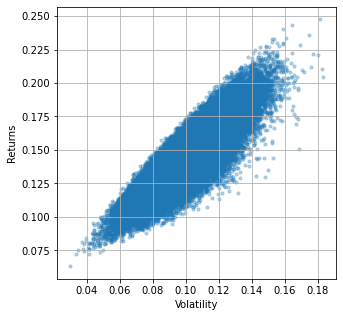

In [16]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[5,5])

In [17]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.
min_vol_port

Returns         0.062942
Volatility      0.029673
BCSVX weight    0.010460
BUFHX weight    0.312725
FSPTX weight    0.017679
MSMLX weight    0.011560
PRISX weight    0.014751
PTIAX weight    0.285100
QUSIX weight    0.001261
SIUSX weight    0.346464
Name: 19074, dtype: float64

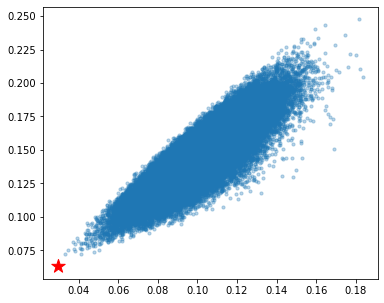

In [18]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[6,5])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=200)

In [19]:
# Finding the optimal portfolio
rf = 0.03 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         0.132366
Volatility      0.068154
BCSVX weight    0.259891
BUFHX weight    0.073685
FSPTX weight    0.101783
MSMLX weight    0.039817
PRISX weight    0.000007
PTIAX weight    0.151409
QUSIX weight    0.015001
SIUSX weight    0.358408
Name: 19289, dtype: float64

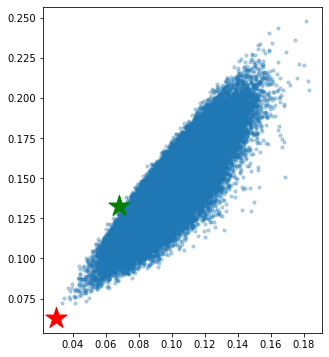

In [20]:
# Plotting optimal portfolio
plt.subplots(figsize=(5, 6))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)